# Praktikum 1
### Group Members 
1. 13516044 - Annisa Sekar Ayuningtyas
2. 13516078 - Muhammad Alif Arifin
3. 13516152 - Deborah Aprilia Josephine

## Import Library and Dataset

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections

Using TensorFlow backend.


In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [3]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, GRU, LSTM, CuDNNGRU, CuDNNLSTM, Activation, Flatten, Dropout, SimpleRNN

## Preprocessing

In [4]:
train_df = pd.read_csv('train.csv')
train_df

,Unnamed: 0,Unnamed: 0.1,time,frontal,vertical,lateral,id,rssi,phase,freq,label,people,male
0,0,0,0.00,0.272030,1.00820,-0.082102,1,-63.5,2.42520,924.25,1,train/d1p01M,0
1,1,1,0.50,0.272030,1.00820,-0.082102,1,-63.0,4.73690,921.75,1,train/d1p01M,0
2,2,2,1.50,0.447910,0.91636,-0.013684,1,-63.5,3.03110,923.75,1,train/d1p01M,0
3,3,3,1.75,0.447910,0.91636,-0.013684,1,-63.0,2.03710,921.25,1,train/d1p01M,0
4,4,4,2.50,0.342380,0.96229,-0.059296,1,-63.5,5.89200,920.25,1,train/d1p01M,0
5,5,5,3.25,0.342380,0.96229,-0.059296,4,-56.5,1.25630,924.75,1,train/d1p01M,0
6,6,6,4.00,0.307210,0.99674,-0.070699,1,-63.5,3.87180,922.75,1,train/d1p01M,0
7,7,7,5.00,0.272030,0.99674,-0.093505,1,-64.0,2.49430,924.25,1,train/d1p01M,0
8,8,8,5.50,0.236850,1.03120,-0.127710,1,-64.5,2.00800,924.75,1,train/d1p01M,0
9,9,9,6.00,0.236850,1.03120,-0.127710,1,-66.0,1.19040,925.75,1,train/d1p01M,0


In [5]:
test_df = pd.read_csv('test.csv')
test_df

,Unnamed: 0,Unnamed: 0.1,time,frontal,vertical,lateral,id,rssi,phase,freq,label,people,male
0,0,321,217.50,1.15140,-0.27789,-0.025087,3,-48.5,5.149600,924.75,3,test/d1p01M,0
1,1,322,217.75,1.01070,-0.19751,-0.093505,3,-49.5,4.497600,925.75,3,test/d1p01M,0
2,2,323,218.00,0.88175,-0.18603,-0.139120,3,-48.5,5.855200,923.75,3,test/d1p01M,0
3,3,324,218.75,0.96383,-0.19751,-0.116310,3,-49.0,4.789100,925.25,3,test/d1p01M,0
4,4,325,220.00,0.90520,-0.19751,-0.127710,3,-49.0,5.154200,924.75,3,test/d1p01M,0
5,5,326,220.25,1.02250,-0.20899,-0.104910,3,-49.5,4.523700,925.75,3,test/d1p01M,0
6,6,327,221.00,1.03420,-0.19751,-0.093505,3,-49.5,4.925600,925.25,3,test/d1p01M,0
7,7,328,222.75,0.92865,-0.18603,-0.104910,3,-50.0,4.543700,925.75,3,test/d1p01M,0
8,8,329,224.25,1.11630,-0.26641,-0.036490,3,-49.5,1.164300,921.75,3,test/d1p01M,0
9,9,330,224.50,0.94038,-0.19751,-0.116310,3,-49.0,6.277000,923.25,3,test/d1p01M,0


In [6]:
targets_train = train_df['label']
features_train = train_df.drop(columns=['label', 'Unnamed: 0', 'Unnamed: 0.1', 'people'])

targets_test = test_df['label']
features_test = test_df.drop(columns=['label', 'Unnamed: 0', 'Unnamed: 0.1', 'people'])

print (features_train.shape)
print (targets_train.shape)
print (features_test.shape)
print (targets_test.shape)

(60139, 9)
(60139,)
(14989, 9)
(14989,)


In [7]:
def normalize(data) :
    min_data = data.min()
    max_data = data.max()
    result = list(map(lambda x: (x-min_data)/(max_data-min_data)*1, data))
    return result

normalize_features = ['freq', 'phase', 'rssi']

for normalize_feature in normalize_features :
    features_train[normalize_feature] = normalize(features_train[normalize_feature])
    features_test[normalize_feature] = normalize(features_test[normalize_feature])
    
features_train['id'] = pd.Categorical(features_train['id'])
dfId = pd.get_dummies(features_train['id'], prefix = 'id')
features_train = pd.concat([features_train, dfId], axis=1)
features_train = features_train.drop(columns=['id'], axis=1)

features_test['id'] = pd.Categorical(features_test['id'])
dfId = pd.get_dummies(features_test['id'], prefix = 'id')
features_test = pd.concat([features_test, dfId], axis=1)
features_test = features_test.drop(columns=['id'], axis=1)

print (features_train.shape)
print (features_test.shape)

(60139, 12)
(14989, 12)


In [8]:
features_train = np.array(features_train)
features_test = np.array(features_test)
features_train = features_train.reshape(features_train.shape[0], features_train.shape[1], 1)
features_test = features_test.reshape(features_test.shape[0], features_test.shape[1], 1)

print (features_train.shape)
print (features_test.shape)

(60139, 12, 1)
(14989, 12, 1)


## Model

In [13]:
def show_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### RNN

In [10]:
rnn = Sequential()
rnn.add(SimpleRNN(units=32, input_shape=(features_train.shape[1], 1), activation="relu"))
rnn.add(Dense(8, activation="relu")) 
rnn.add(Dense(1))
rnn.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
history_rnn = rnn.fit(features_train, targets_train, batch_size = 2, epochs = 10, verbose = 0, validation_split=0.1)

In [11]:
predict_rnn = rnn.predict(features_test, verbose=0)
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


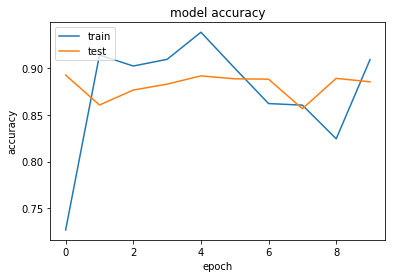

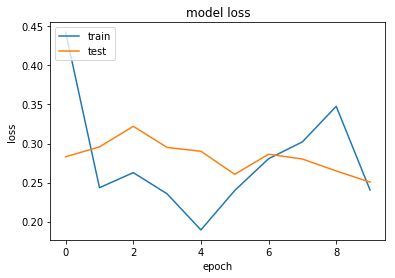

In [14]:
show_history(history_rnn)

### LSTM

In [28]:
lstm = Sequential()
lstm.add(LSTM(1,input_shape=(features_train.shape[1], 1),return_sequences=False))#True = many to many
lstm.add(Dense(2,kernel_initializer='normal',activation='linear'))
lstm.add(Dense(1,kernel_initializer='normal',activation='linear'))
lstm.compile(loss='mse',optimizer ='adam',metrics=['accuracy'])
history_lstm = lstm.fit(
    features_train,
    targets_train,
    validation_split = 0.1,
    epochs = 8,
    batch_size = 2,
)

Train on 54125 samples, validate on 6014 samples
Epoch 1/8
54125/54125 [==============================] - 168s 3ms/step - loss: 0.9184 - accuracy: 0.1090 - val_loss: 0.5599 - val_accuracy: 0.0333
Epoch 2/8
54125/54125 [==============================] - 162s 3ms/step - loss: 0.8646 - accuracy: 0.1396 - val_loss: 0.6146 - val_accuracy: 0.0333
Epoch 3/8
54125/54125 [==============================] - 157s 3ms/step - loss: 0.8589 - accuracy: 0.1934 - val_loss: 0.5601 - val_accuracy: 0.0333
Epoch 4/8
54125/54125 [==============================] - 173s 3ms/step - loss: 0.8529 - accuracy: 0.2123 - val_loss: 0.4848 - val_accuracy: 0.6270
Epoch 5/8
54125/54125 [==============================] - 168s 3ms/step - loss: 0.8465 - accuracy: 0.2355 - val_loss: 0.5097 - val_accuracy: 0.0471
Epoch 6/8
54125/54125 [==============================] - 177s 3ms/step - loss: 0.8264 - accuracy: 0.2647 - val_loss: 0.5900 - val_accuracy: 0.0333
Epoch 7/8
54125/54125 [==============================] - 166s 3ms/ste

In [29]:
predict_lstm = lstm.predict(features_test)

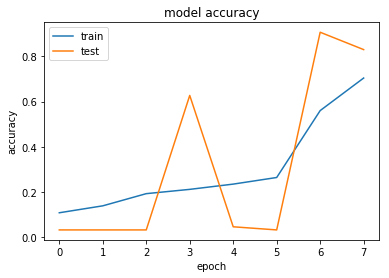

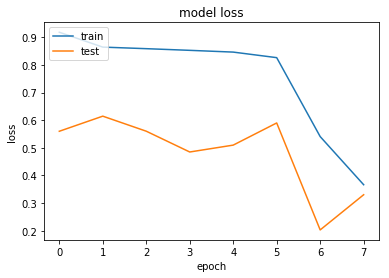

In [30]:
show_history(history_lstm)

### GRU

In [18]:
gru = Sequential()
gru.add(GRU(256, input_shape = (features_train.shape[1], 1), return_sequences = True))
gru.add(GRU(1, return_sequences = False))
gru.add(Dropout(0.1))
gru.add(Activation('linear'))

gru.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

history_gru = gru.fit(features_train, targets_train, batch_size = 100, epochs = 10, verbose = 0, validation_split=0.1)

In [19]:
predict_gru = gru.predict(features_test, verbose=0)

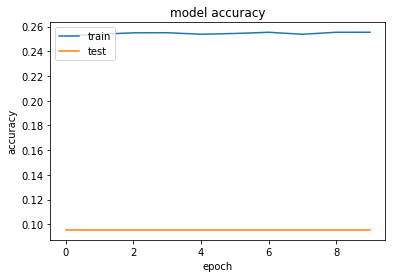

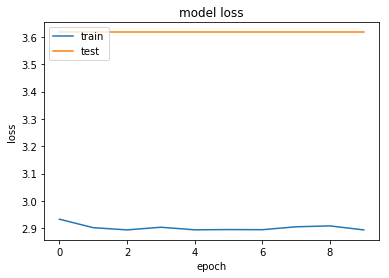

In [20]:
show_history(history_gru)

## Evaluation

In [21]:
def evaluation_result(y_true, y_pred) :
    f1_score_test = f1_score(y_true, y_pred, average='macro')
    accuracy_score_test = accuracy_score(y_true, y_pred)
    confusion_matrix_test = confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4])
    np.set_printoptions(precision=2)
    print (f"Accuracy\t: ", round(accuracy_score_test*100, 2))
    print (f"F1 score\t: ", round(f1_score_test*100,2))
    print('Confusion matrix')
    print(confusion_matrix_test)

In [22]:
np.round(predict_gru)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [23]:
predict_gru

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [24]:
evaluation_result(targets_test, np.round(predict_rnn))
evaluation_result(targets_test, np.round(predict_lstm))
evaluation_result(targets_test, np.round(predict_gru))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy	:  93.57
F1 score	:  32.52
Confusion matrix
[[  315   108    86     0]
 [  286    55    11     3]
 [    1     1 13651     0]
 [  301   131    29     4]]
Accuracy	:  2.39
F1 score	:  1.17
Confusion matrix
[[    0   511     0     0]
 [    0   358     0     0]
 [    0 13653     0     0]
 [    0   467     0     0]]
Accuracy	:  3.41
F1 score	:  1.65
Confusion matrix
[[  511     0     0     0]
 [  358     0     0     0]
 [13653     0     0     0]
 [  467     0     0     0]]
